# 1. Chargement des données
## 1.1 Importation des bibliothèques nécessaires (pandas, numpy, etc.)

On commence par importer les outils Python indispensables pour manipuler les données et effectuer des calculs.

In [309]:
import pandas as pd
import numpy as np

## 1.2 Lecture du fichier CSV contenant les données (appartements-data-db.csv)

On charge les données depuis un fichier CSV pour pouvoir les analyser et travailler dessus.


In [310]:
# Chargement des données depuis le fichier CSV
df = pd.read_csv('../data/appartements-data-db.csv')

## 1.3 Visualisation des premières lignes du dataset avec `df.head()`

On affiche les premières lignes du tableau pour avoir un aperçu rapide des données.

In [311]:
df.head()

,title,price,city_name,salon,nb_rooms,nb_baths,surface_area,equipment,link
0,CMN-MA-1752 - Appartement à vendre à Palmier,2 000 000 DH,Casablanca,NaN,2.0,2.0,168.0,Ascenseur/Balcon/Parking/Terrasse,https://www.avito.ma/fr/palmier/appartements/C...
1,66370-Vente Appt à Casablanca Hay Hassani de 1...,1 195 000 DH,Casablanca,NaN,2.0,2.0,98.0,Ascenseur/Balcon/Chauffage/Climatisation/Cuisi...,https://www.avito.ma/fr/hay_hassani/appartemen...
2,Appartement à vendre 81 m² à Dar Bouazza,1 350 000 DH,Dar Bouazza,1.0,2.0,2.0,81.0,Ascenseur/Balcon/Chauffage/Climatisation/Conci...,https://www.avito.ma/fr/dar_bouazza/appartemen...
3,63860-Vente Appt à Casablanca Quartier Bd Med ...,900 000 DH,Casablanca,NaN,1.0,1.0,56.0,Ascenseur/Chauffage/Climatisation/Cuisine Équi...,https://www.avito.ma/fr/centre_ville/apparteme...
4,Appartement à Rabat Agdal,3 100 000 DH,Rabat,2.0,3.0,2.0,200.0,Ascenseur/Balcon/Concierge/Parking/Sécurité,https://www.avito.ma/fr/agdal/appartements/App...


## 1.4 Analyse de la structure du dataset avec `df.info()` pour repérer les types et les valeurs manquantes

On examine la composition du tableau : types des colonnes, nombre de valeurs non nulles, pour identifier d’éventuels manques.

In [312]:
# Dimensions et types de données
print('Dimensions et types de données')
print(df.info())



Dimensions et types de données
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1773 entries, 0 to 1772
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         1772 non-null   object 
 1   price         1490 non-null   object 
 2   city_name     1772 non-null   object 
 3   salon         1620 non-null   float64
 4   nb_rooms      1490 non-null   float64
 5   nb_baths      1480 non-null   float64
 6   surface_area  1742 non-null   float64
 7   equipment     1402 non-null   object 
 8   link          1773 non-null   object 
dtypes: float64(4), object(5)
memory usage: 124.8+ KB
None


## 2. Analyse exploratoire des données (EDA)

### 2.1 Vérification des dimensions et des types des colonnes

On vérifie la taille du jeu de données ainsi que le type de chaque colonne pour mieux comprendre sa structure.


In [313]:
print('Shape:', df.shape)
print('Types:', df.dtypes)

Shape: (1773, 9)
Types: title            object
price            object
city_name        object
salon           float64
nb_rooms        float64
nb_baths        float64
surface_area    float64
equipment        object
link             object
dtype: object


### 2.2 Recherche des valeurs manquantes

On identifie les colonnes qui contiennent des données absentes afin de décider comment les gérer.


In [314]:
# Valeurs manquantes et doublons
print('Valeurs manquantes par colonne:')
print(df.isnull().sum())

Valeurs manquantes par colonne:
title             1
price           283
city_name         1
salon           153
nb_rooms        283
nb_baths        293
surface_area     31
equipment       371
link              0
dtype: int64


### 2.3 Vérification et suppression des doublons

On détecte et supprime les lignes répétées pour éviter les biais dans l’analyse.


In [315]:
# Suppression des doublons
print('Nombre de doublons:', df.duplicated().sum())
df = df.drop_duplicates()
print('Doublons supprimés. Nouvelle forme:', df.shape)

Nombre de doublons: 41
Doublons supprimés. Nouvelle forme: (1732, 9)


### 2.4 Statistiques descriptives générales pour les variables numériques

On calcule des statistiques basiques (moyenne, médiane, écart-type…) pour résumer les données numériques.


In [316]:
# Statistiques descriptives et histogrammes des variables numériques
print(df.describe())


             salon     nb_rooms     nb_baths   surface_area
count  1579.000000  1454.000000  1444.000000    1701.000000
mean      1.263458     2.381706     2.263850     176.827160
std       0.555193     0.668407     7.424766    3005.066251
min       0.000000     1.000000     0.000000       1.000000
25%       1.000000     2.000000     1.000000      71.000000
50%       1.000000     2.000000     2.000000      88.000000
75%       1.000000     3.000000     2.000000     114.000000
max       8.000000     7.000000   134.000000  123456.000000



### 2.5 Visualisation des distributions avec des histogrammes

On trace des histogrammes pour observer la répartition des valeurs dans les colonnes numériques.


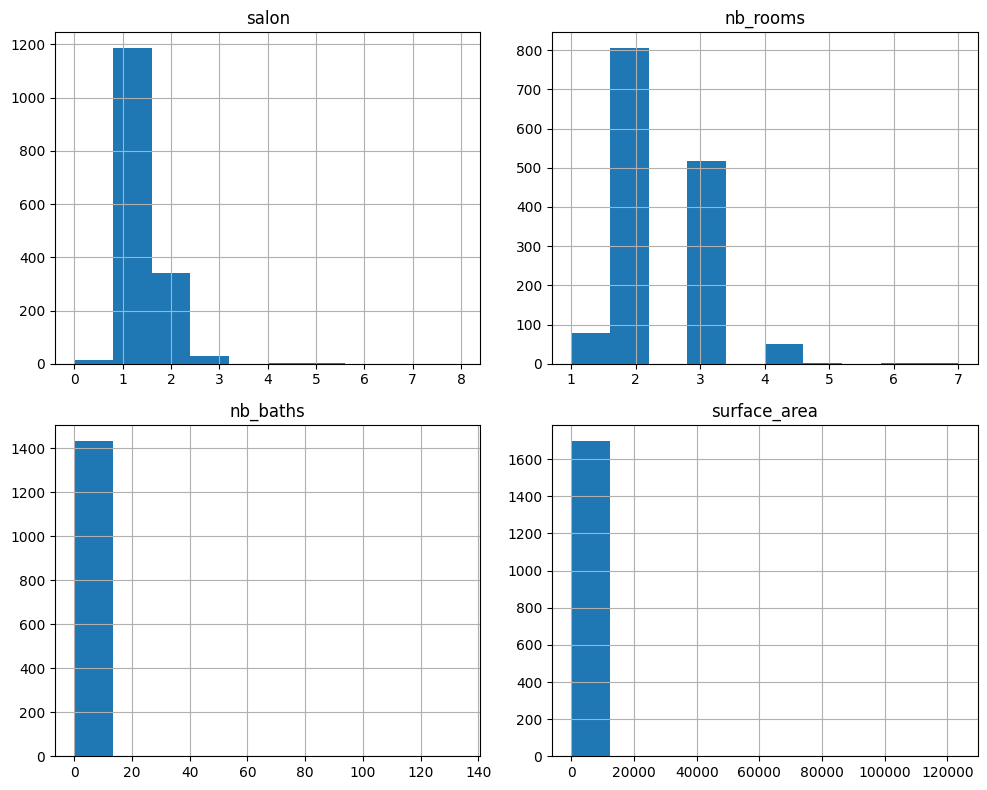

In [317]:
import matplotlib.pyplot as plt
df.select_dtypes(include=np.number).hist(figsize=(10,8))
plt.tight_layout()
plt.show()


### 2.6 Matrice de corrélation et heatmap pour détecter les relations entre variables

On calcule et visualise la corrélation entre variables pour comprendre leurs interactions.


                 salon  nb_rooms  nb_baths  surface_area
salon         1.000000  0.301097  0.031103     -0.002133
nb_rooms      0.301097  1.000000  0.053043      0.617838
nb_baths      0.031103  0.053043  1.000000      0.045448
surface_area -0.002133  0.617838  0.045448      1.000000


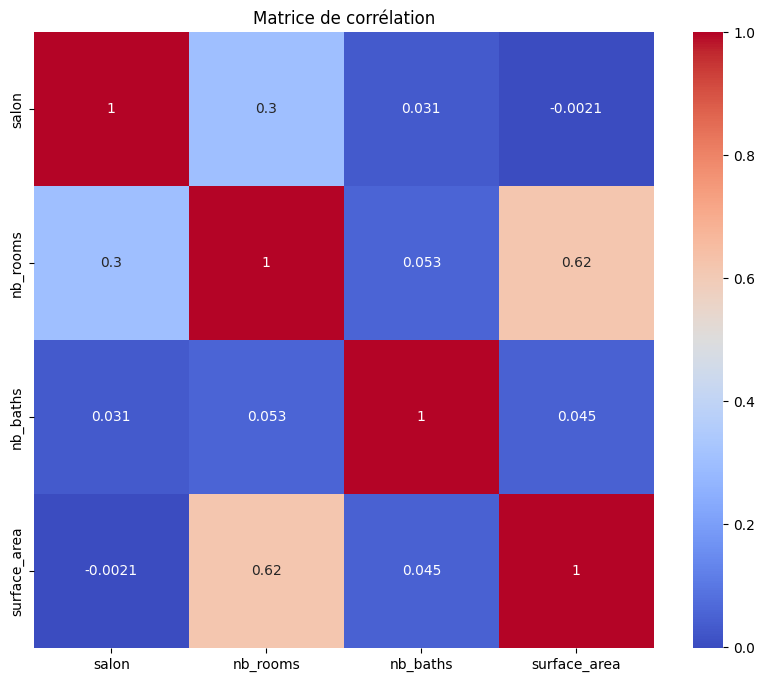

In [318]:
# Matrice de corrélation et heatmap
corr = df.corr(numeric_only=True)
print(corr)
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Matrice de corrélation')
plt.show()



### 2.7 Analyse des relations entre `price` et d’autres variables via `scatterplot`

On explore graphiquement comment le prix varie en fonction d’autres caractéristiques.

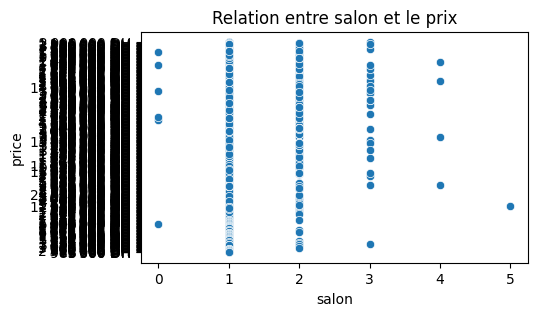

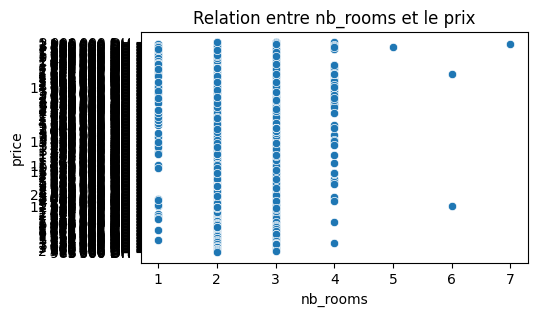

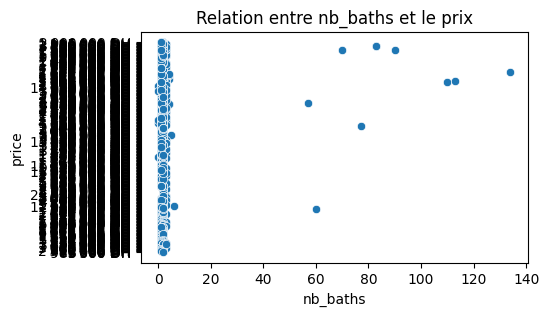

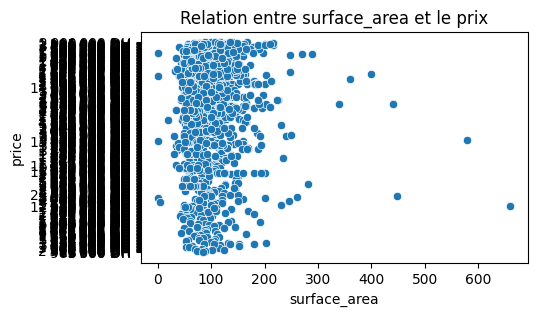

In [319]:
# Visualisation simple des relations entre chaque variable numérique et le prix
import matplotlib.pyplot as plt
import seaborn as sns
if 'price' in df.columns and not df['price'].isnull().all():
    numeric_cols = [col for col in df.select_dtypes(include=np.number).columns if col != 'price']
    for col in numeric_cols:
        if df[col].isnull().all():
            print(f"Toutes les valeurs de la colonne '{col}' sont manquantes.")
            continue
        plt.figure(figsize=(5,3))
        sns.scatterplot(x=df[col], y=df['price'])
        plt.title(f'Relation entre {col} et le prix')
        plt.xlabel(col)
        plt.ylabel('price')
        plt.show()

## 3. Prétraitement des données

### 3.1 Transformation de la colonne `equipment` en colonnes binaires (dummies)

On convertit les équipements listés en plusieurs colonnes indiquant la présence ou non de chaque équipement.


In [320]:
# Extraction des équipements en colonnes booléennes
if 'equipment' in df.columns:
    equipment_dummies = df['equipment'].str.get_dummies(sep='/')
    df = pd.concat([df, equipment_dummies], axis=1)
    print('Colonnes équipements extraites :', equipment_dummies.columns.tolist())

Colonnes équipements extraites : ['Ascenseur', 'Balcon', 'Chauffage', 'Climatisation', 'Concierge', 'Cuisine Équipée', 'Duplex', 'Meublé', 'Parking', 'Sécurité', 'Terrasse']



### 3.2 Nettoyage des formats numériques (`price` → float)

On s’assure que la colonne `price` est bien au format numérique pour pouvoir faire des calculs.


In [321]:
# Conversion de la colonne price en float et suppression des colonnes inutiles
print("\n1. Conversion de la colonne 'price' en float et suppression des NaN...")
if 'price' in df.columns:
    df['price'] = df['price'].astype(str).str.replace(r'[^\d.]', '', regex=True)
    df['price'] = pd.to_numeric(df['price'], errors='coerce')
    print("Colonne 'price' convertie en float.")


1. Conversion de la colonne 'price' en float et suppression des NaN...
Colonne 'price' convertie en float.



### 3.3 Suppression des colonnes non pertinentes (`equipment`, `link`,`title`)

On retire les colonnes qui n’apportent pas d’information utile au modèle.


In [322]:
if 'equipment' in df.columns:
    df = df.drop('equipment', axis=1)
if 'link' in df.columns:
    df = df.drop('link', axis=1)
if 'title' in df.columns:
    df = df.drop('title', axis=1)


### 3.4 Harmonisation des noms de villes (traduction arabe ➝ français)

On uniformise les noms de villes pour éviter les doublons dus à des traductions différentes.


In [323]:
# Traitement et uniformisation de la colonne city_name
city_map = {
    "الدار البيضاء": "Casablanca",
    "دار بوعزة": "Dar Bouazza",
    "الرباط": "Rabat",
    "مراكش": "Marrakech",
    "أصيلة": "Asilah",
    "بوسكورة": "Bouskoura",
    "القنيطرة": "Kénitra",
    "المحمدية": "Mohammedia",
    "أكادير": "Agadir",
    "تمارة الجديدة": "Tamesna",
    "سلا": "Salé",
    "حد سوالم": "Had Soualem",
    "تمارة": "Temara",
    "بن سليمان": "Benslimane",
    "طنجة": "Tanger",
    "بوزنيقة": "Bouznika",
    "مكناس": "Meknès",
    "فاس": "Fès",
    "الجديدة": "El Jadida",
    "المنصورية": "El Mansouria",
    "مرتيل": "Martil",
    "الفنيدق": "Fnideq",
    "تطوان": "Tétouan",
    "السعيدية": "Saidia",
    "النواصر": "Nouaceur",
    "تماريس": "Tamaris",
    "كابو نيكرو": "Cabo Negro",
    "سيدي علال البحراوي": "Sidi Allal El Bahraoui",
    "بني ملال": "Béni Mellal",
    "غير معروف": "Unknown",
    "الصويرة": "Essaouira",
    "المهدية": "Mehdia",
    "وجدة": "Oujda",
    "وادي لاو": "Oued Laou",
    "الدشيرة": "Dcheira",
    "سيدي رحال": "Sidi Rahal",
    "دروة": "Deroua",
    "عين عتيق": "Ain Attig",
    "آسفي": "Safi",
    "إنزكان": "Inzegan",
    "إفران": "Ifrane",
    "الداخلة": "Dakhla",
    "الدشيرة الجهادية": "Dcheïra El Jihadia",
    "تغازوت": "Taghazout",
    "سيدي بوكنادل": "Sidi Bouknadel",
    "الصخيرات": "Skhirat",
    "خريبكة": "Khouribga",
    "بركان": "Berkane",
    "مرس الخير": "Mers El Kheir",
    "برشيد": "Berrechid",
    "تيزنيت": "Tiznit",
    "أكادير ملول": "Agadir Melloul",
    "الناظور": "Nador",
    "المنزه": "El Menzeh",
    "بني أنصار": "Bni Ansar",
    "المضيق": "Mdiq",
    "تيط مليل": "Tit Mellil",
    "سوق أربعاء": "Souk El Arbaa",
    "بيوڭرى": "Biougra",
    "سطات": "Settat",
    "عين عودة": "Ain Aouda",
    "تازة": "Taza",
    "الخميسات": "Khemisset",
    "وادي زم": "Oued Zem",
    "صفرو": "Sefrou",
    "مرزوكة": "Merzouga",
    "الحاجب": "El Hajeb",
    "سلوان": "Selouane",
    "تاونات": "Taounate",
    "سيدي بنور": "Sidi Bennour",
    "القصيبة": "El Ksiba"
}
if 'city_name' in df.columns:
    df['city_name'] = df['city_name'].replace(city_map)
    df['city_name'] = df['city_name'].fillna('Unknown')


### 3.5 Traitement des valeurs manquantes :

- Suppression des lignes sans `price` car la cible est obligatoire  
- Remplacement des valeurs numériques manquantes par la médiane  
- Remplacement des valeurs catégorielles manquantes par `'Unknown'`


In [324]:
# Imputation des valeurs manquantes et suppression des NaN dans 'price'
# Suppression des lignes avec NaN dans 'price' (variable cible)
if 'price' in df.columns:
    initial_price_nan_rows = df['price'].isnull().sum()
    if initial_price_nan_rows > 0:
        df.dropna(subset=['price'], inplace=True)
        print(f"{initial_price_nan_rows} lignes avec des valeurs manquantes dans 'price' ont été supprimées.")
    print(f"Nouvelle dimension du DataFrame après suppression des NaN de 'price': {df.shape}")

# Colonnes numériques : médiane
num_cols = df.select_dtypes(include=np.number).columns
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())
# Colonnes catégorielles : 'Unknown'
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    df[col] = df[col].fillna('Unknown')


278 lignes avec des valeurs manquantes dans 'price' ont été supprimées.
Nouvelle dimension du DataFrame après suppression des NaN de 'price': (1454, 17)



### 3.6 Création de nouvelles variables (feature engineering) :

- Calcul du prix au mètre carré (`price_per_m2`)  
- Calcul du nombre total de pièces (`total_rooms`)  
- Transformation logarithmique du prix (`log_price`) pour réduire la variance
`log_price` est le logarithme du prix qui réduit l’effet des valeurs extrêmes en compressant la distribution des prix pour faciliter l’apprentissage.



In [325]:
# Feature engineering : création de nouvelles variables utiles
df['price_per_m2'] = df['price'] / df['surface_area']
df['total_rooms'] = df['nb_rooms'] + df.get('salon', 0)
df['log_price'] = np.log1p(df['price'])
print("Nouvelles variables créées : price_per_m2, total_rooms, log_price")
df[['price', 'surface_area', 'price_per_m2', 'total_rooms', 'log_price']].head()

Nouvelles variables créées : price_per_m2, total_rooms, log_price


,price,surface_area,price_per_m2,total_rooms,log_price
0,2000000.0,168.0,11904.761905,3.0,14.508658
1,1195000.0,98.0,12193.877551,3.0,13.993658
2,1350000.0,81.0,16666.666667,3.0,14.115616
3,900000.0,56.0,16071.428571,2.0,13.710151
4,3100000.0,200.0,15500.000000,5.0,14.946913



### 3.7 Gestion des valeurs aberrantes (outliers) :

- Visualisation des distributions avec des boxplots pour chaque variable numérique à virgule flottante.
- Application d’un capping global des valeurs extrêmes sur toutes les colonnes float selon la méthode IQR, en limitant les bornes inférieures à zéro pour éviter les valeurs négatives.
- Pour la colonne `price`, un capping spécifique est appliqué **localement par ville** afin de mieux prendre en compte les variations régionales.
- Certaines colonnes clés (`surface_area`, `nb_baths`, `nb_rooms`) sont plafonnées avec des seuils métier pour exclure des valeurs irréalistes.
- Un rapport résumé affiche les bornes utilisées pour chaque variable après traitement, permettant un suivi clair des ajustements effectués.



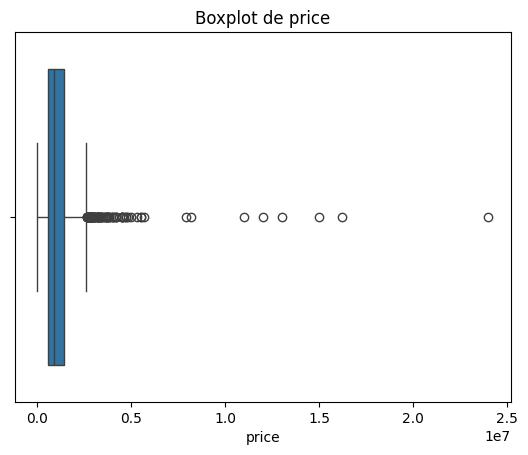

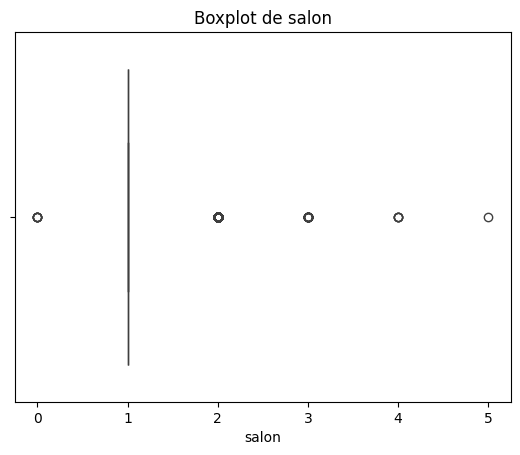

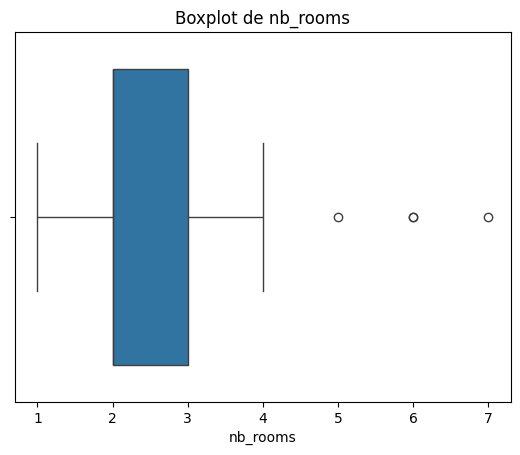

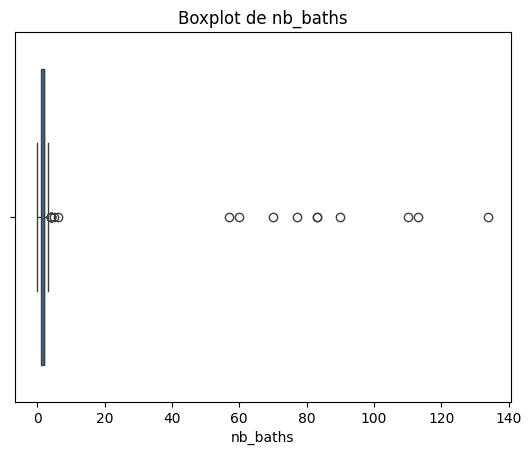

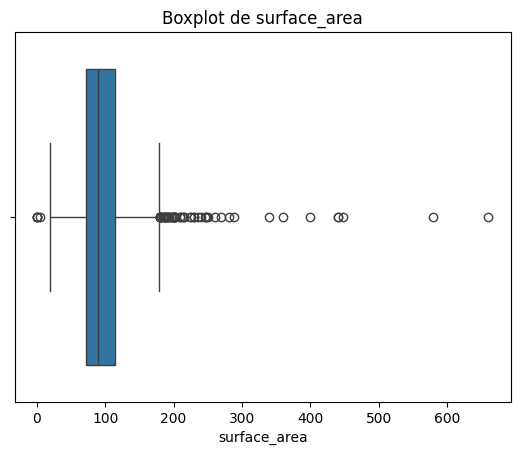

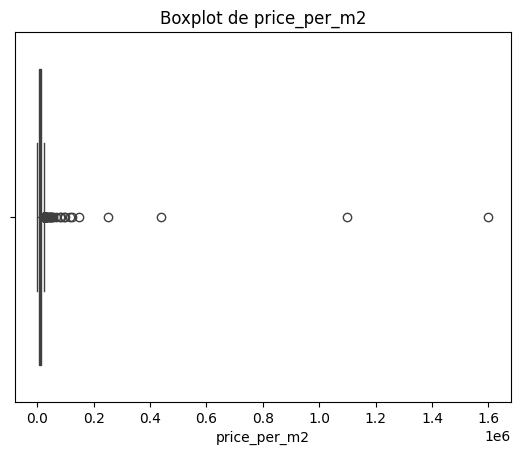

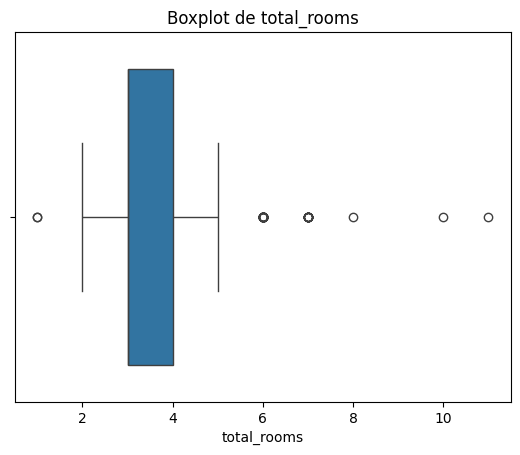

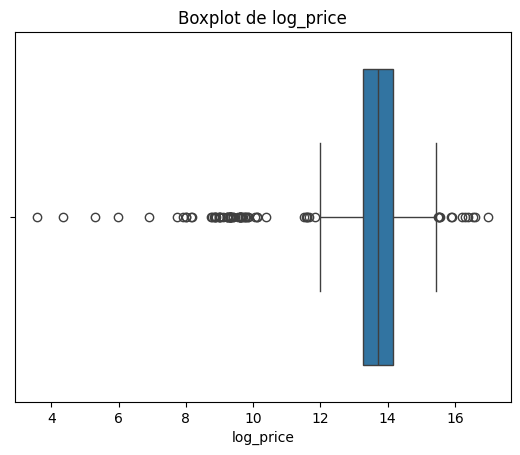

In [326]:
#show boxplots pour visualiser les outliers
for i in df.select_dtypes(include='float').columns:
    sns.boxplot(data=df, x=i)
    plt.title(f'Boxplot de {i}')
    plt.show()


In [327]:
# # Capping des outliers pour toutes les colonnes float selon bornes IQR
cols=df.select_dtypes(include='float64').columns
for col in cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower = max(q1 - 1.5 * iqr, 0)  # 🔒 éviter des valeurs négatives
    upper = q3 + 1.5 * iqr
    df[col] = df[col].clip(lower, upper)
    print(f"Outliers capés pour {col} : bornes [{lower:.2f}, {upper:.2f}]")
outlier_report = {}


Outliers capés pour price : bornes [0.00, 2628125.00]
Outliers capés pour salon : bornes [1.00, 1.00]
Outliers capés pour nb_rooms : bornes [0.50, 4.50]
Outliers capés pour nb_baths : bornes [0.00, 3.50]
Outliers capés pour surface_area : bornes [7.50, 179.50]
Outliers capés pour price_per_m2 : bornes [0.00, 23322.95]
Outliers capés pour total_rooms : bornes [1.50, 5.50]
Outliers capés pour log_price : bornes [11.95, 15.47]


In [328]:

# Traitement price par ville avec capping IQR
if 'city_name' in df.columns and 'price' in df.columns:
    for city in df['city_name'].unique():
        mask = df['city_name'] == city
        q1 = df.loc[mask, 'price'].quantile(0.25)
        q3 = df.loc[mask, 'price'].quantile(0.75)
        iqr = q3 - q1
        lower, upper = q1 - 1.5 * iqr, q3 + 1.5 * iqr
        df.loc[mask, 'price'] = df.loc[mask, 'price'].clip(lower, upper)
        outlier_report[city] = [round(lower, 0), round(upper, 0)]


In [329]:

# Capping surface_area
if 'surface_area' in df.columns:
    df['surface_area'] = df['surface_area'].clip(40, 300)
    outlier_report['surface_area'] = [40, 300]

# Capping nb_baths
if 'nb_baths' in df.columns:
    df['nb_baths'] = np.minimum(df['nb_baths'], 4)
    outlier_report['nb_baths'] = ['max 4']

# Capping nb_rooms (optionnel)
if 'nb_rooms' in df.columns:
    df['nb_rooms'] = np.minimum(df['nb_rooms'], 5)
    outlier_report['nb_rooms'] = ['max 5']

print("Résumé du traitement des outliers :")
for key, val in outlier_report.items():
    print(f"{key}: {val}")


Résumé du traitement des outliers :
Casablanca: [np.float64(-747500.0), np.float64(3112500.0)]
Dar Bouazza: [np.float64(-762500.0), np.float64(2897500.0)]
Rabat: [np.float64(-981250.0), np.float64(4408750.0)]
Marrakech: [np.float64(-475000.0), np.float64(2445000.0)]
Asilah: [np.float64(302500.0), np.float64(1282500.0)]
Bouskoura: [np.float64(342125.0), np.float64(1443125.0)]
Kénitra: [np.float64(84999.0), np.float64(1405001.0)]
Mohammedia: [np.float64(-150000.0), np.float64(2090000.0)]
Tamesna: [np.float64(-111875.0), np.float64(1333125.0)]
Salé: [np.float64(-317500.0), np.float64(1982500.0)]
Had Soualem: [np.float64(270000.0), np.float64(830000.0)]
Benslimane: [np.float64(1099999.0), np.float64(1099999.0)]
Agadir: [np.float64(-476500.0), np.float64(2527500.0)]
Temara: [np.float64(-163750.0), np.float64(2406250.0)]
Tanger: [np.float64(-989000.0), np.float64(2875000.0)]
Bouznika: [np.float64(300000.0), np.float64(1020000.0)]
Meknès: [np.float64(-537500.0), np.float64(1682500.0)]
Fès: [n

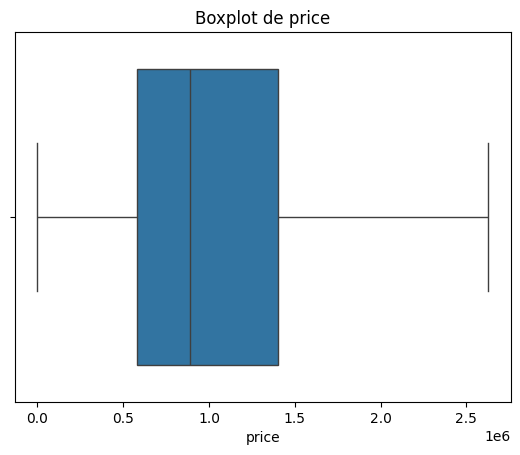

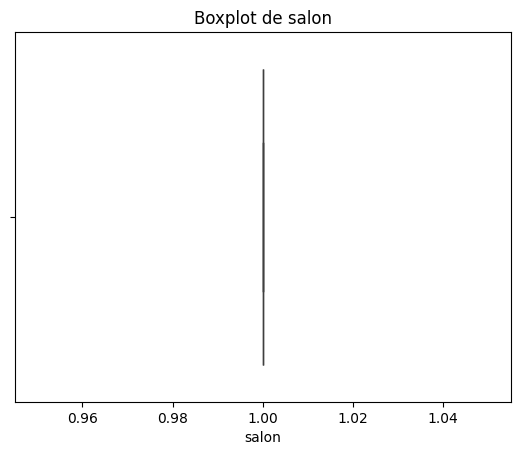

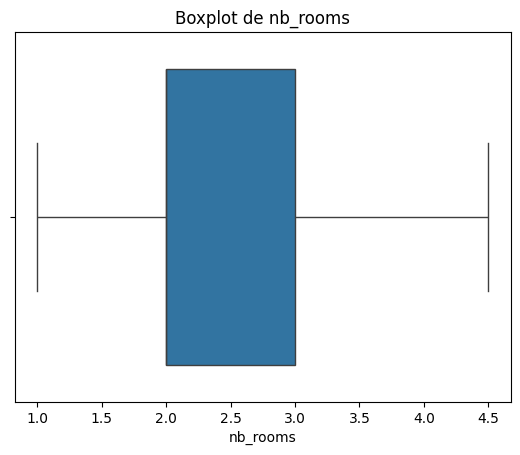

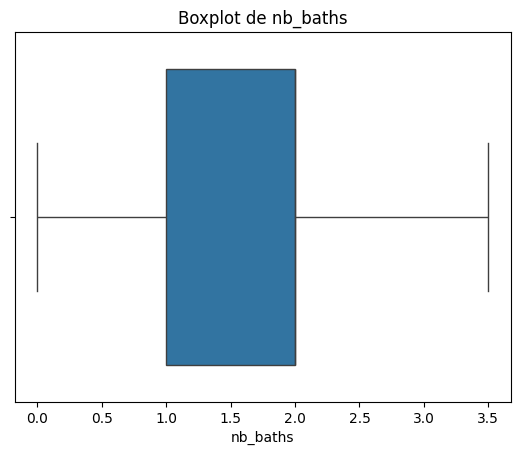

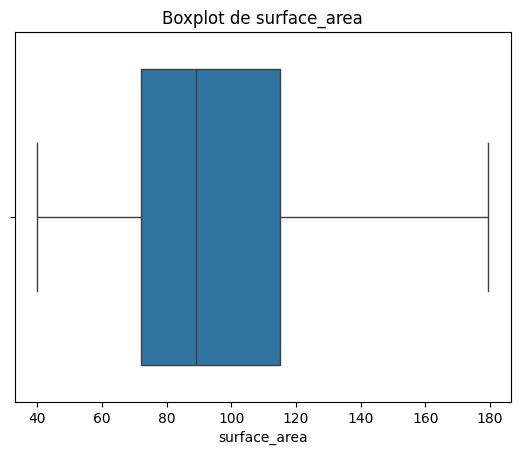

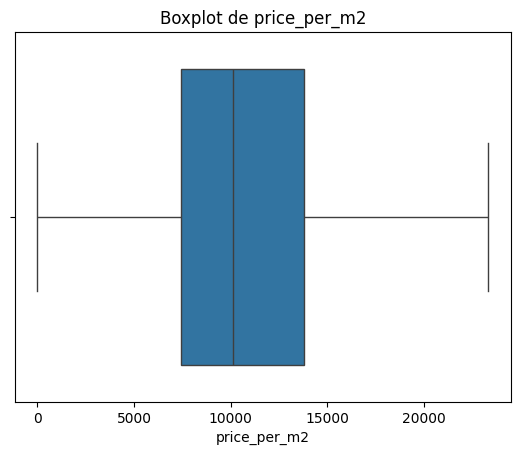

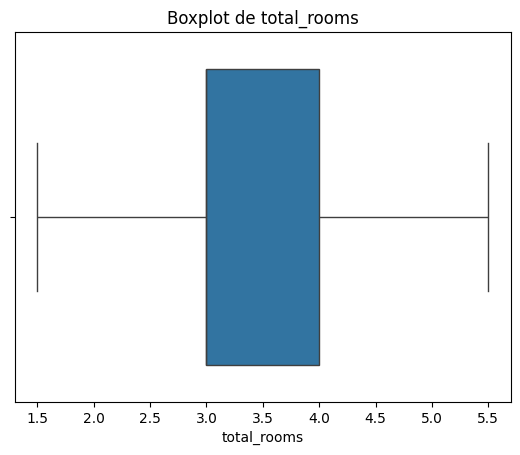

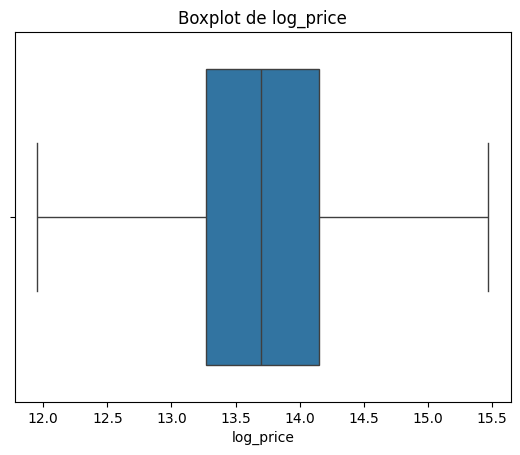

In [330]:
#show boxplots pour visualiser les outliers
for i in df.select_dtypes(include='float').columns:
    sns.boxplot(data=df, x=i)
    plt.title(f'Boxplot de {i}')
    plt.show()


### 3.8 Encodage des variables catégorielles (`LabelEncoder`)

On transforme les catégories en nombres pour que les modèles puissent les utiliser.


In [331]:
# Encodage de la colonne city_name avec LabelEncoder
from sklearn.preprocessing import LabelEncoder
if 'city_name' in df.columns:
    le = LabelEncoder()
    df['city_name_encoded'] = le.fit_transform(df['city_name'])
    print("Colonne 'city_name' encodée (LabelEncoder) dans 'city_name_encoded'.")

Colonne 'city_name' encodée (LabelEncoder) dans 'city_name_encoded'.



### 3.9 Normalisation des variables numériques (`StandardScaler`)

On standardise les variables numériques pour les rendre comparables et faciliter l’apprentissage.


In [332]:
# Application de la standardisation (StandardScaler) sur les variables numériques
from sklearn.preprocessing import StandardScaler
numeric_cols = df.select_dtypes(include=['float64']).columns.tolist()
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[numeric_cols]), columns=numeric_cols)
print("Variables numériques standardisées prêtes pour la modélisation.")
df_scaled.head()

Variables numériques standardisées prêtes pour la modélisation.


,price,salon,nb_rooms,nb_baths,surface_area,price_per_m2,total_rooms,log_price
0,1.414123,0.0,-0.581652,0.509547,2.138607,0.181045,-0.708192,1.126936
1,0.201301,0.0,-0.581652,0.509547,0.057348,0.235943,-0.708192,0.409589
2,0.434826,0.0,-0.581652,0.509547,-0.448100,1.085245,-0.708192,0.579465
3,-0.243149,0.0,-2.122128,-1.075225,-1.191407,0.972220,-1.902059,0.014691
4,2.360463,0.0,0.958825,0.509547,2.480528,0.863716,1.679543,1.737383


## 4. Sélection des variables explicatives

### 4.1 Corrélation des variables avec la cible `price`

On mesure le lien entre chaque variable et la variable cible `price` pour repérer celles qui ont un impact important.


In [333]:
# 1. Calcul des corrélations avec 'price'
corr_matrix = df.corr(numeric_only=True)
price_corr = corr_matrix['price'].drop('price')


### 4.2 Sélection des features les plus pertinentes (|corr| > 0.15)

On conserve uniquement les variables dont la corrélation (positive ou négative) avec le prix est significative (valeur absolue supérieure à 0.15).


In [334]:
# 2. Sélection des variables corrélées au prix (|corr| > 0.15)
selected_vars = price_corr[price_corr.abs() > 0.15].sort_values(ascending=False)
print("Variables corrélées au prix (|corr| > 0.15) :")
for var, val in selected_vars.items():
    print(f"- {var} : corr = {val:.2f}")

Variables corrélées au prix (|corr| > 0.15) :
- log_price : corr = 0.94
- price_per_m2 : corr = 0.80
- surface_area : corr = 0.63
- nb_baths : corr = 0.41
- total_rooms : corr = 0.37
- nb_rooms : corr = 0.35
- Ascenseur : corr = 0.34
- Parking : corr = 0.26
- Climatisation : corr = 0.23
- Terrasse : corr = 0.22
- Chauffage : corr = 0.21
- Concierge : corr = 0.21
- Balcon : corr = 0.16



### 4.3 Détection et suppression des variables fortement corrélées entre elles (|corr| > 0.8)

On supprime les variables très similaires entre elles pour éviter la redondance et améliorer la performance du modèle.


In [335]:
# 3. Vérification de la redondance entre les variables sélectionnées
selected_corr = corr_matrix.loc[selected_vars.index, selected_vars.index]

#  Détection des couples fortement corrélés entre eux (|corr| > 0.8)
high_corr_pairs = []
for i, var1 in enumerate(selected_vars.index):
    for var2 in selected_vars.index[i+1:]:
        corr_val = selected_corr.loc[var1, var2]
        if abs(corr_val) > 0.8:
            high_corr_pairs.append((var1, var2, corr_val))

if high_corr_pairs:
    print("\n🔁 Variables très corrélées entre elles (|corr| > 0.8) :")
    for v1, v2, val in high_corr_pairs:
        print(f"- {v1} & {v2} : corr = {val:.2f}")
else:
    print("\n✅ Aucune forte redondance détectée.")


🔁 Variables très corrélées entre elles (|corr| > 0.8) :
- log_price & price_per_m2 : corr = 0.82
- total_rooms & nb_rooms : corr = 0.86


## 5. 🔄 Séparation des données

### 5.1 🎯 Définition de la variable cible `y`

La variable cible est la **valeur à prédire** par notre modèle.  
Ici, il s’agit du **prix de l’appartement (`price`)**.


In [336]:
# Séparation des données pour la modélisation
from sklearn.model_selection import train_test_split
# Variable cible
y = df['price']


### 5.2 🧠 Sélection des variables explicatives `X`

Les variables explicatives (*features*) sont les colonnes utilisées pour expliquer ou prédire le prix.  
Elles sont choisies selon leur corrélation au prix et leur non-redondance avec d'autres variables.


In [337]:
# Variables explicatives : colonnes sélectionnées précédemment
features = [var for var in selected_vars.index if var != 'log_price']
X = df[features]


### 5.3 ✂️ Division du dataset en jeu d’entraînement et de test (80/20)

Le dataset est divisé en deux parties :
- **Jeu d’entraînement (80%)** : utilisé pour entraîner le modèle.
- **Jeu de test (20%)** : utilisé pour évaluer la performance du modèle sur des données inconnues.


In [338]:
# Division des données en ensemble d'entraînement et de test (80% / 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Taille de X_train : {X_train.shape}")
print(f"Taille de X_test : {X_test.shape}")
print(f"Taille de y_train : {y_train.shape}")
print(f"Taille de y_test : {y_test.shape}")

Taille de X_train : (1163, 12)
Taille de X_test : (291, 12)
Taille de y_train : (1163,)
Taille de y_test : (291,)


# 6. 🤖 Entraînement et sélection des modèles de régression

---

## 6.1 ⚙️ Entraînement des modèles de base

Nous entraînons plusieurs modèles classiques pour la régression :

- Régression Linéaire
- Random Forest Regressor
- Support Vector Regressor (SVR)
- Gradient Boosting Regressor

Chaque modèle sera entraîné sur le jeu d'entraînement, puis évalué sur le jeu de test.



In [339]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

models = {
    'Régression Linéaire': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'SVR': SVR(),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

for name, model in models.items():
    print(f"\n=== {name} ===")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"MSE  : {mse:.2f}")
    print(f"RMSE : {rmse:.2f}")
    print(f"MAE  : {mae:.2f}")
    print(f"R²   : {r2:.2f}")



=== Régression Linéaire ===
MSE  : 36389324463.99
RMSE : 190759.86
MAE  : 114035.40
R²   : 0.93

=== Random Forest ===
MSE  : 14676254304.44
RMSE : 121145.59
MAE  : 38235.40
R²   : 0.97

=== SVR ===
MSE  : 524231948662.78
RMSE : 724038.64
MAE  : 537553.96
R²   : -0.07

=== Gradient Boosting ===
MSE  : 16859717392.26
RMSE : 129844.97
MAE  : 57034.02
R²   : 0.97


## 6.2 🔁 Validation croisée (5-fold)

Pour évaluer la robustesse des modèles, on réalise une validation croisée 5-fold sur l’ensemble complet des données.

On mesure le score R² moyen et son écart-type pour chaque modèle.



Validation croisée (5-fold) - Score R² moyen et écart-type :
Régression Linéaire: R² moyen = 0.913, écart-type = 0.017


Random Forest: R² moyen = 0.970, écart-type = 0.011
SVR: R² moyen = -0.085, écart-type = 0.056
Gradient Boosting: R² moyen = 0.962, écart-type = 0.011


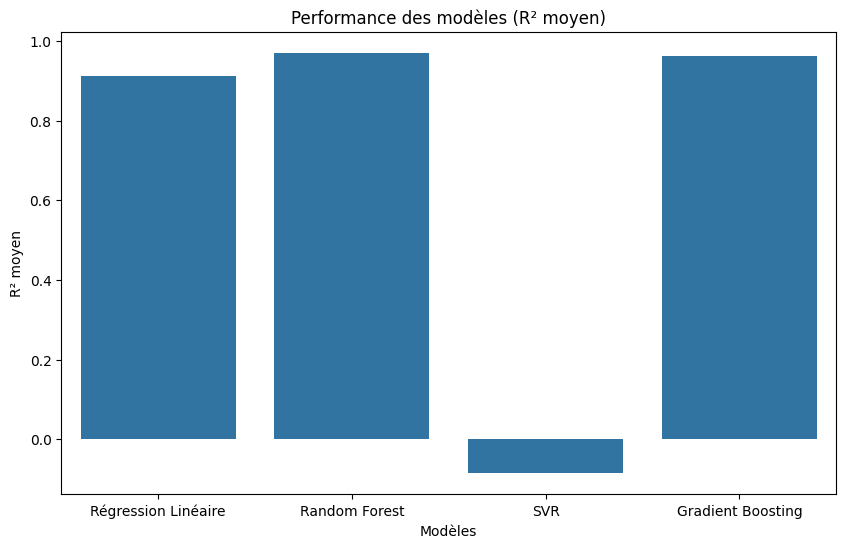

In [340]:
from sklearn.model_selection import cross_val_score

print("Validation croisée (5-fold) - Score R² moyen et écart-type :")
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    print(f"{name}: R² moyen = {scores.mean():.3f}, écart-type = {scores.std():.3f}")
# Visualisation des performances des modèles
import matplotlib.pyplot as plt 
import seaborn as sns
model_names = list(models.keys())
r2_scores = [cross_val_score(model, X, y, cv=5, scoring='r2').mean() for model in models.values()]
plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=r2_scores)
plt.title('Performance des modèles (R² moyen)')
plt.xlabel('Modèles')
plt.ylabel('R² moyen')
plt.show()

## 6.3 🔧 Optimisation des hyperparamètres

On optimise les hyperparamètres des modèles à l’aide de GridSearchCV (pour la régression linéaire) et RandomizedSearchCV (pour les autres modèles plus complexes).

Cela permet d’améliorer la performance en testant plusieurs configurations.



In [341]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

best_params = {}

# Régression Linéaire (GridSearch)
lr_grid = {'fit_intercept': [True, False]}
lr_search = GridSearchCV(LinearRegression(), lr_grid, cv=3, scoring='r2')
lr_search.fit(X, y)
best_params['Régression Linéaire'] = lr_search.best_params_
print(f"Régression Linéaire - meilleurs paramètres : {lr_search.best_params_}")

# Random Forest (RandomizedSearch)
rf_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5]
}
rf_search = RandomizedSearchCV(
    RandomForestRegressor(random_state=42),
    rf_grid,
    n_iter=6,
    cv=3,
    scoring='r2',
    n_jobs=-1,
    random_state=42
)
rf_search.fit(X, y)
best_params['Random Forest'] = rf_search.best_params_
print(f"Random Forest - meilleurs paramètres : {rf_search.best_params_}")

# SVR (RandomizedSearch)
svr_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}
svr_search = RandomizedSearchCV(
    SVR(),
    svr_grid,
    n_iter=6,
    cv=3,
    scoring='r2',
    n_jobs=-1,
    random_state=42
)
svr_search.fit(X, y)
best_params['SVR'] = svr_search.best_params_
print(f"SVR - meilleurs paramètres : {svr_search.best_params_}")

# Gradient Boosting (RandomizedSearch)
gb_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5]
}
gb_search = RandomizedSearchCV(
    GradientBoostingRegressor(random_state=42),
    gb_grid,
    n_iter=6,
    cv=3,
    scoring='r2',
    n_jobs=-1,
    random_state=42
)
gb_search.fit(X, y)
best_params['Gradient Boosting'] = gb_search.best_params_
print(f"Gradient Boosting - meilleurs paramètres : {gb_search.best_params_}")

print("\nRésumé des meilleurs hyperparamètres pour chaque modèle :")
for name, params in best_params.items():
    print(f"{name}: {params}")


Régression Linéaire - meilleurs paramètres : {'fit_intercept': True}
Random Forest - meilleurs paramètres : {'n_estimators': 50, 'min_samples_split': 5, 'max_depth': None}
SVR - meilleurs paramètres : {'kernel': 'linear', 'gamma': 'auto', 'C': 10}
Gradient Boosting - meilleurs paramètres : {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1}

Résumé des meilleurs hyperparamètres pour chaque modèle :
Régression Linéaire: {'fit_intercept': True}
Random Forest: {'n_estimators': 50, 'min_samples_split': 5, 'max_depth': None}
SVR: {'kernel': 'linear', 'gamma': 'auto', 'C': 10}
Gradient Boosting: {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1}


## 6.4 🔁 Validation croisée approfondie (10-fold)

On évalue les modèles optimisés via une validation croisée 10-fold, avec calcul du MAE et du R² moyen, pour une estimation fine de la performance.



Validation croisée (10-fold) - MAE et R² moyens :
Régression Linéaire:
  🔹 MAE moyen = 113905.78, écart-type = 10882.77
  🔹 R² moyen  = 0.9129, écart-type = 0.0263
Random Forest:
  🔹 MAE moyen = 39483.98, écart-type = 12516.33
  🔹 R² moyen  = 0.9671, écart-type = 0.0267
SVR:
  🔹 MAE moyen = 506669.89, écart-type = 38766.79
  🔹 R² moyen  = -0.0848, écart-type = 0.0562
Gradient Boosting:
  🔹 MAE moyen = 53662.50, écart-type = 8931.45
  🔹 R² moyen  = 0.9610, écart-type = 0.0248


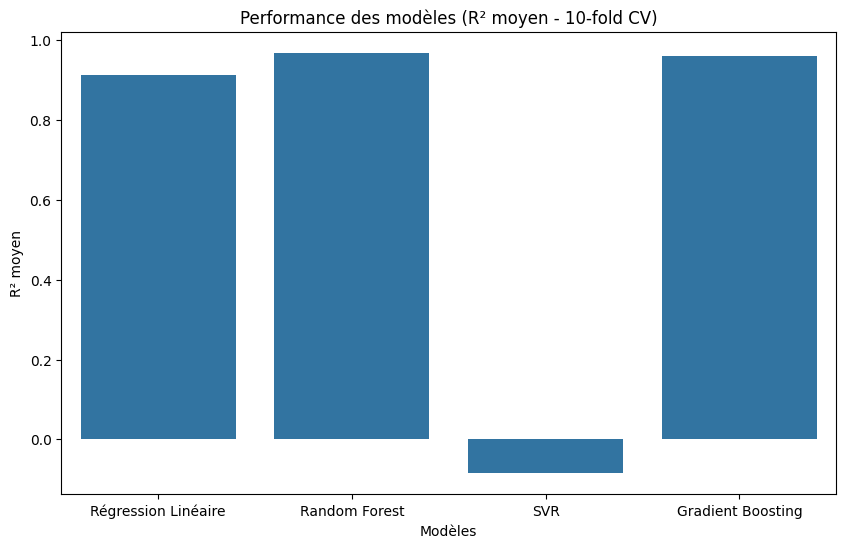

In [342]:
print("Validation croisée (10-fold) - MAE et R² moyens :")
for name, model in models.items():
    mae_scores = -cross_val_score(model, X, y, cv=10, scoring='neg_mean_absolute_error')
    r2_scores = cross_val_score(model, X, y, cv=10, scoring='r2')

    print(f"{name}:")
    print(f"  🔹 MAE moyen = {mae_scores.mean():.2f}, écart-type = {mae_scores.std():.2f}")
    print(f"  🔹 R² moyen  = {r2_scores.mean():.4f}, écart-type = {r2_scores.std():.4f}")
# Visualisation des performances des modèles


import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.barplot(x=list(models.keys()), y=[cross_val_score(model, X, y, cv=10, scoring='r2').mean() for model in models.values()])
plt.title('Performance des modèles (R² moyen - 10-fold CV)')
plt.xlabel('Modèles')
plt.ylabel('R² moyen')
plt.show()


## 6.5 🏆 Sélection et sauvegarde du meilleur modèle

On sélectionne le meilleur modèle selon les métriques R² et RMSE sur le jeu test, puis on sauvegarde ce modèle pour usage futur.



In [343]:
import joblib

results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    results.append({'name': name, 'model': model, 'r2': r2, 'rmse': rmse})

best = max(results, key=lambda x: (x['r2'], -x['rmse']))

print(f"Meilleur modèle : {best['name']} | R² = {best['r2']:.3f} | RMSE = {best['rmse']:.2f}")

joblib.dump(best['model'], '../models/model2.pkl')
print("Modèle sauvegardé dans 'model.pkl'")


Meilleur modèle : Random Forest | R² = 0.970 | RMSE = 121145.59
Modèle sauvegardé dans 'model.pkl'
